<a href="https://colab.research.google.com/github/yvzn/news-catch-up/blob/main/News_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# News clustering

Given a set of news headlines, group semantically similar news titles using an embedding model and a clustering algorithm.

## Install dependencies

- SBERT (embedding model)

In [ ]:
import sys
!{sys.executable} -m pip install -U sentence-transformers

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [51]:
messages = [
    r"Israel Strikes Beirut as Tensions With Hezbollah Escalate: Middle East Live Updates",
    r"Fears of escalation grow as Israel signals readiness for war with Hezbollah: Live updates",
    r"Israel Army Says Conducted 'Targeted Strike' In Beirut",
    r"Hezbollah hits northern Israel with 140 rockets",
    r"Trump says Jewish voters will carry ‘a lot’ of blame if he loses election - live",
    r"Harris Hits Core Campaign Themes in Emotional Forum With Oprah Winfrey",
    r"Oprah’s Kamala Harris fundraiser: Does her support swing elections?",
    r"With abortion in focus, Harris’s event with Oprah prompts cheers and tears",
    r"Hezbollah pager blasts: Taiwan says device parts not made on island",
    r"Harris campaign highlights Trump’s past praise for Mark Robinson as CNN report roils battleground North Carolina",
    r"Scientists looked deep beneath the Doomsday Glacier. What they found spells potential disaster for the planet",
    r"Sources: Embiid agrees to 3-year, $192.9M deal",
    r"Why Katy Perry's comeback has gone so wrong",
    r"New York magazine writer Olivia Nuzzi placed on leave after disclosing RFK relationship",
    r"Hillary Clinton recalls seeing Melania Trump at Rosalynn Carter's funeral: Like 'kid' outside birthday party",
    r"It’s over for good – Ford is removing this feature from its new cars to cut manufacturing costs",
    r"Zoo admits that their pandas are ‘painted dogs’ after backlash from visitors",
    r"Kentucky judge shot and killed in chambers, sheriff charged with murder: Officials",
    r"‘Grim Outlook’ for Thwaites Glacier",
    r"U.S. spends the most but ranks last in health compared with other high-income nations, new report says",
    r"Some Muslim Americans moving to Jill Stein in potential blow to Kamala Harris",
    r"Washington and the West struggle for a way forward with Putin’s Russia",
    r"Israeli soldiers seen pushing bodies off rooftops during raid in occupied West Bank",
    r"With $39 Billion Loan for Ukraine, Europe Moves Ahead Without U.S.",
    r"Former Harrods owner Mohamed Al Fayed a ‘monster,’ say lawyers representing his alleged victims",
    r"Sean ‘Diddy’ Combs latest: Rapper ‘put on suicide watch’ as he awaits trial behind bars",
    r"Horoscope for Friday, September 20, 2024",
    r"Lady Gaga explains why she didn’t bother to address the rumor she is a man",
    r"“Love your child!”: Wayans calls out Musk's transphobia towards daughter",
    r"Jennifer Lopez and Ben Affleck reunite, attend back-to-school night together amid ongoing divorce: report",
    r"Sacramento Mexican restaurant closing after more than 40 years",
    r"Blue Bell’s Decadent New Ice Cream Flavor Was Made For Chocolate Lovers",
    r"China Harbor Restaurant will close its doors after 30 years",
    r"Check Out Unity 6's Features In The New Cinematic Demo",
    r"Microsoft Flight Simulator 2024 \"ideally\" requires 64GB RAM on PC",
    r"‘Concord’ Director Reportedly Steps Down Following Game’s Failure, Fellow Firewalk Studios Devs Presume Mass Layoffs Inbound",
    r"Fact Check: This video of Israeli airstrikes on Lebanon is OLD",
    r"Fact Check: Trump insists he was named \"Man of The Year\" in Michigan",
    r"Trump falsely says Harris wants to revive the draft",
    r"Fact Check: Trump Says Dogs Were Left Behind in Afghanistan by US Military",
    r"What's the point of buying the latest smart phone?",
    r"The 75 Greatest Horror Movies of All Time",
    r"In an Unprecedented Move, Ohio Is Funding the Construction of Private Religious Schools",
    r"The Insurrectionists Next Door",
    r"Four Seasons Unveils Priciest High-Rise Listing in Las Vegas",
    r"Arizona Couple Splurged on Splashy Surprises During a SoCal Reno",
    r"Creative Force Behind Faena Miami Lists Flamboyant Penthouse",
    r"A presidential race of increasing uncertainty",
    r"Where are the Haitians for Trump in this latest racist attack?",
    r"EDITORIAL: Mary Trump's diagnosis of her uncle",
    r"Take part in Diversity, Equity, and Inclusion focus groups",
    r"Dirt path gets upgrade to sidewalk on busy Washington St.",
    r"Top 10 things to do in Wellesley",
    r"Brooklyn Healthcare Workers Rally Against Trump's Remarks on...",
    r"Brooklyn Homeowners Rally to Repeal Short Term Rental Law",
    r"Sean 'Diddy' Combs Held in Notorious Brooklyn Jail",
    r"Strange odor sends Dixon students home early Thursday",
    r"Police: Threat at Oregon High School not credible",
    r"Hidden piece of Sterling church’s history now sees light of day",
    r"Exploding devices trigger painful memories of port blast",
    r"Kentucky sheriff charged in killing of judge at courthouse",
    r"Huge king penguin chick Pesto grows into social media star",
    r"Dunn County official facing GSI charges attends school event",
    r"Biologist shares insights on 2024 ND pheasant season prospects",
    r"Volunteer Carol Herauf leaves lasting impact on local community",
    r"Kingsport Aquatic Center to re-open Sept. 30 after renovations",
    r"Road linking West Ridge to Henry Harr Road almost done",
    r"Sports Huddle Episode 5: High School Football RunDown with the Tri-Cities Best Sports Team!",
    r"Hezbollah handed out pagers hours before blasts - after checks",
    r"Hezbollah device hack exposes dark corners of Asia supply chains",
    r"Israel and Hezbollah trade fire after heaviest airstrikes yet",
    r"Oatlands Hosts Naturalization Ceremony for 30 New Citizens",
    r"Teen Charged for Making 9/11 Threats Against Students",
    r"Middleburg Readies for Saturday's Oktoberfest",
    r"KSP: Letcher Co. District Judge dead after allegedly being shot by sheriff",
    r"Sean 'Diddy' Combs Placed on Suicide Watch While Awaiting Trial But Mental State Unclear, Sources Say (Exclusive)",
    r"Archaeologists finally solve mystery behind oldest tombstone in US belonging to English knight",
    r"The Insurrectionists Next Door"
]

## Build sentence embeddings

Numeric representation of news messages

https://learn.deeplearning.ai/courses/embedding-models-from-architecture-to-implementation

In [52]:
from sentence_transformers import SentenceTransformer

sentenceTransformer = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

embeddings = []
for t in messages:
    emb = list(sentenceTransformer.encode(t))
    embeddings.append(emb)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Visualize embeddings using PCA

https://medium.com/@pasdan/visualize-word-embeddings-with-pca-decomposition-using-scikit-learn-pipelines-2ec28c29b029

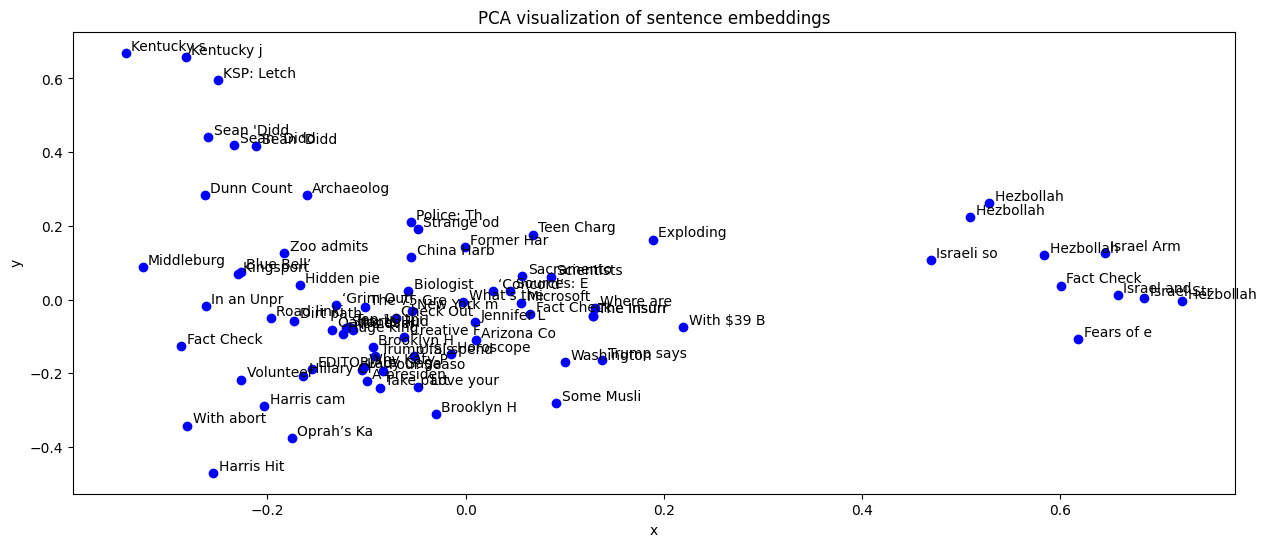

In [53]:
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components=2)

x, y = pca.fit_transform(embeddings).T

fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(x, y, c='b')

for i, term in enumerate(messages):
    ax.annotate(
        term[0:10],
        (x[i], y[i]),
        xytext=(4, 2),
        textcoords='offset points'
    )

plt.title('PCA visualization of sentence embeddings')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Create clusters of similar news

News titles on the same topic will have embedding vectors close one to another.

The DBSCAN algorithm creates clusters of vector, without having to specify the number of clusters before hand.

https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

To figure out the epsilon-distance required by DBSCAN, do a quick estimate using NearestNeighbors:
- most of the vectors are withing a 1.0 distance one from another

https://datascientest.com/machine-learning-clustering-dbscan


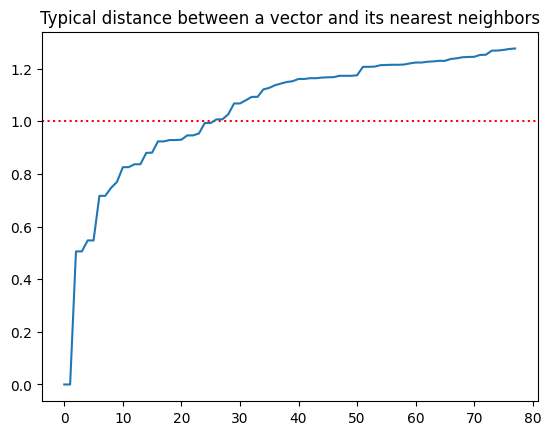

In [61]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(embeddings)
distances, indices = nbrs.kneighbors(embeddings)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.title('Typical distance between a vector and its nearest neighbors')
plt.axhline(y=1.0, color='r', linestyle='dotted')
plt.plot(distances);

Run the DBSCAN algorithm

In [58]:
from sklearn.cluster import DBSCAN

y_pred = DBSCAN(eps = 1, min_samples=2).fit_predict(embeddings)

Use PCA again to visualize embeddings and their predicted cluster

(NB: *Noisy samples* are given the cluster label -1: those samples do not fit in any cluster of size > 2)

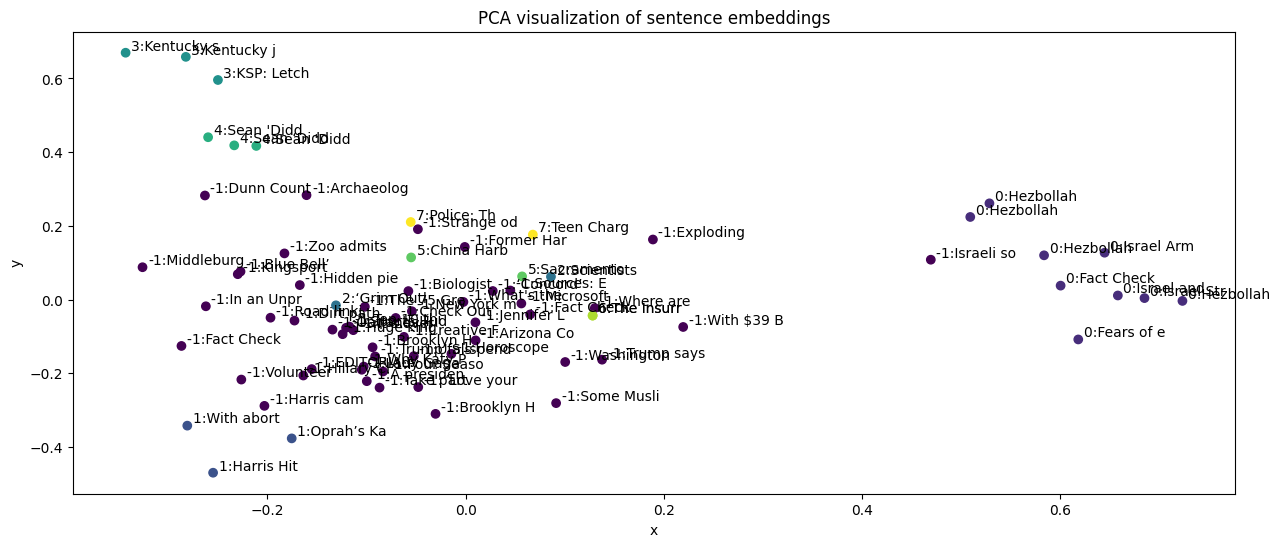

In [59]:
pca = PCA(n_components=2)

x, y = pca.fit_transform(embeddings).T

fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(x, y, c=y_pred)

for i, term in enumerate(messages):
    ax.annotate(
        f'{y_pred[i]}:{term[0:10]}',
        (x[i], y[i]),
        xytext=(4, 2),
        textcoords='offset points'
    )

plt.title('PCA visualization of sentence embeddings')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Show the news clusters as a DataFrame

In [60]:
import pandas as pd

d = {'news headline': messages, 'cluster': y_pred}
df = pd.DataFrame(data=d)

df

,news headline,cluster
0,Israel Strikes Beirut as Tensions With Hezboll...,0
1,Fears of escalation grow as Israel signals rea...,0
2,Israel Army Says Conducted 'Targeted Strike' I...,0
3,Hezbollah hits northern Israel with 140 rockets,0
4,Trump says Jewish voters will carry ‘a lot’ of...,-1
...,...,...
73,Middleburg Readies for Saturday's Oktoberfest,-1
74,KSP: Letcher Co. District Judge dead after all...,3
75,Sean 'Diddy' Combs Placed on Suicide Watch Whi...,4
76,Archaeologists finally solve mystery behind ol...,-1
